In [1]:
import pandas as pd
import numpy as np
import torch 
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import librosa
import torchaudio
from IPython.display import Audio
import torchaudio.transforms as T

/home/lang_chain/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/lang_chain/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
T.Resample(orig_freq=22050, new_freq=int(22050 / 0.8))

Resample()

In [2]:
df = pd.read_csv('audio_data_path.csv')
df.head()

,Emotions,Path
0,sad,ravedess/audio_speech_actors_01-24/Actor_11/03...
1,calm,ravedess/audio_speech_actors_01-24/Actor_11/03...
2,disgust,ravedess/audio_speech_actors_01-24/Actor_11/03...
3,surprise,ravedess/audio_speech_actors_01-24/Actor_11/03...
4,calm,ravedess/audio_speech_actors_01-24/Actor_11/03...


In [3]:
df.shape

(12162, 2)

In [4]:
df['Emotions'].value_counts()

Emotions
sad         1923
disgust     1923
happy       1923
fear        1923
angry       1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64

In [3]:
example =  df['Path'][1]

In [5]:
example

'ravedess/audio_speech_actors_01-24/Actor_11/03-01-02-02-02-01-11.wav'

In [6]:
import torchaudio 

In [4]:
import torchaudio 
data, sr = torchaudio.load(example)

In [9]:
data,sr

(tensor([[-1.5259e-04, -1.2207e-04, -1.2207e-04,  ..., -3.0518e-05,
           0.0000e+00,  0.0000e+00]]),
 48000)

In [10]:
def plot_spectrogram(data, sr, title="Spectrogram"):
    spectrogram = torchaudio.transforms.MelSpectrogram()(data)
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.log2().detach()[0,:,:].numpy(), cmap='viridis')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [11]:
#adding the noise 0.005
noise =0.035 * torch.rand(1).item() * torch.amax(data).item()
data_noisy = data + noise

# clamping beteween -1 and 1
data_noisy = torch.clamp(data_noisy, -1.0, 1.0)

/home/lang_chain/anaconda3/lib/python3.9/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


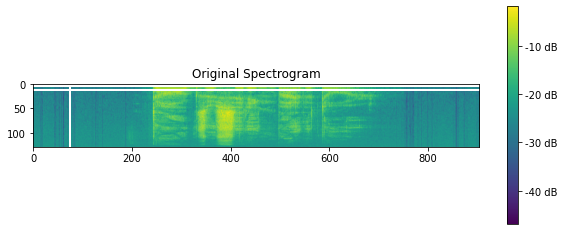

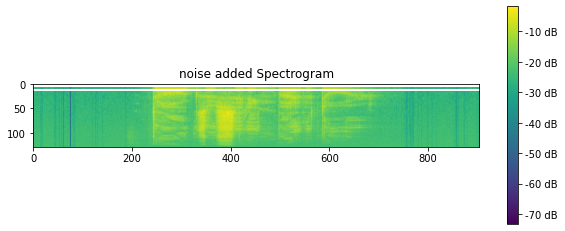

In [12]:
plot_spectrogram(data, sr, title="Original Spectrogram")
plot_spectrogram(data_noisy, sr, title="noise added Spectrogram")

In [13]:
from IPython.display import Audio
Audio(data, rate=sr)

In [14]:
Audio(data_noisy, rate=sr)

In [15]:
def time_stretch(data, sr, stretch_factor=0.8):
    # Resample the audio to achieve time stretching
    resample_transform = T.Resample(orig_freq=sr, new_freq=int(sr / stretch_factor))
    return resample_transform(data)

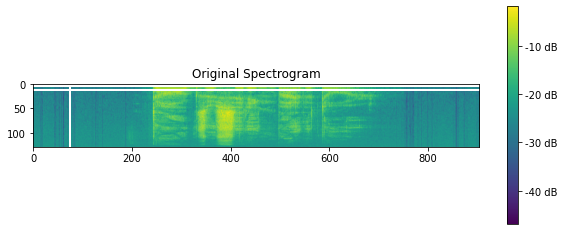

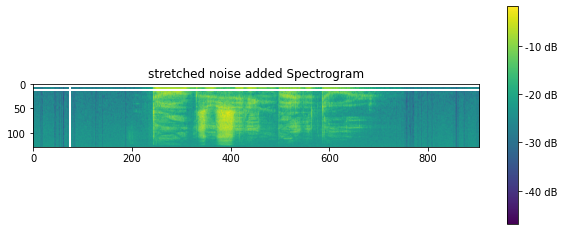

In [16]:
import torchaudio.transforms as T
data_noisy_stretched = time_stretch(data_noisy,sr)
plot_spectrogram(data, sr, title="Original Spectrogram")
plot_spectrogram(data, sr, title="stretched noise added Spectrogram")

In [17]:
Audio(data_noisy_stretched, rate=sr)

In [18]:
def time_shift(data):
    # Roll the audio data
    shift_ratio = int(np.random.uniform(low=-5, high=5) * 1000)
    return torch.roll(data, shifts=shift_ratio, dims=-1)

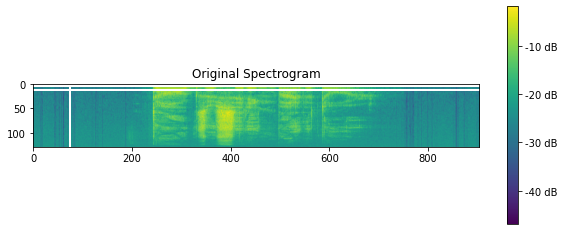

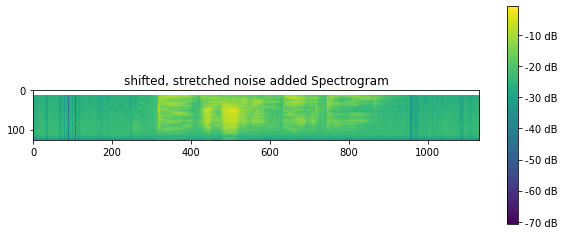

In [19]:
data_noisy_stretched_shifted = time_shift(data_noisy_stretched)
plot_spectrogram(data, sr, title="Original Spectrogram")
plot_spectrogram(data_noisy_stretched_shifted, sr, title="shifted, stretched noise added Spectrogram")

In [20]:
Audio(data_noisy_stretched_shifted, rate=sr)

In [21]:
Audio(data, rate=sr)

In [22]:
def pitch_shift(data, sr, pitch_factor=0.7):
    pitch_shift_transform = T.PitchShift(sr, n_steps=pitch_factor)
    return pitch_shift_transform(data)

/home/lang_chain/anaconda3/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


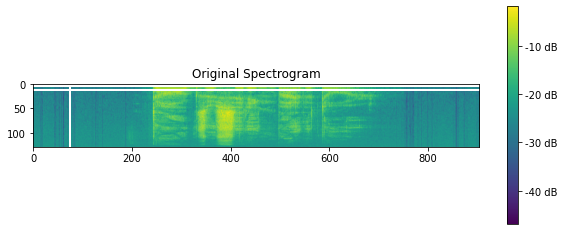

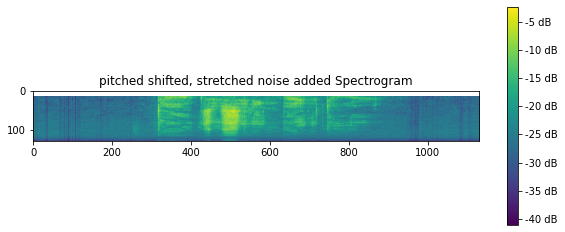

In [23]:
data_noisy_stretched_shifted_pitch = pitch_shift(data_noisy_stretched_shifted,sr)
plot_spectrogram(data, sr, title="Original Spectrogram")
plot_spectrogram(data_noisy_stretched_shifted_pitch, sr, title="pitched shifted, stretched noise added Spectrogram")

In [24]:
data_noisy_stretched_shifted_pitch_np = data_noisy_stretched_shifted_pitch.detach().numpy() 
Audio(data_noisy_stretched_shifted_pitch_np, rate=sr)  